# How Big Does Your Big Data Need To Be?

Thomas Arnold, PhD

arnoldtk@mail.uc.edu

June 11, 2021

One of the tenets of modern data science is that BIG DATA is important.  The question is, how BIG does your BIG DATA need to be?  The following analyses try to answer this question.

One of the tenets of big data is that there are five Vs that are important.  These Vs are volume, velocity, variety, veracity and value. I have not seen a lot of research that explores the connection between these five V concepts.  The analyses shown below connect four of the five Vs.  The only V that is not involved in these calulations is velocity.  

Three sets of analyses are provided.  The first set of analyses indicate how increasing volume affects value.  It will be demonstrated that increases in volume tend to have diminishing returns.  The second set of analyses look at how veracity affects value.  Increases in veracity also have diminishing returns.  The third set of analyses show that variety is one of the more important factors in producing value.  Increases in variety are linearly associated with increses in value.

The analyses indicate that reaching maximum prediction accuracy (value) of R Squared = 1.000 can take some really BIG DATA if you don't have enough variety in your data.  When the variable accuracy (veracity) is r=.05, it can take up to 90,000 variables (volume) to reach maximum value.  The reasons for this problem of diminishing returns for volume and veracity are discussed. 

## Measures

The measures related to the 4 Vs of big data are shown below.

    Volume = Number of predictor variables measured as N
    Veracity = Correlation with the outcome variable measured as r
    Variety = Availability of unique (un-correlated) information
    Value = Accuracy of the result measured as R Squared

## The Connection between Volume, Veracity, and Value

The first two sets of analyses examine how volume and veracity are related to value.  It will be demonstrated that increases in both volume and veracity produce less impact on value as they increase beyond a certain point. 
    
The analyses assesses how many x variables (volume) with fixed r(x,y) (veracity) are needed to achieve a particular R Squared (value) when predicting y.  Note that these calculations initially began in SPSS and I am transitioning to Python as a learning experience.  Python also provides the ability to post to Github so that others might try this out. 

I used ordinary least squares (OLS) regression in these calculations because all of the variables were random normal.  No assumptions of the OLS regression model were violated.

I set up the regression models using randomly generated x variables that were transformed to variables correlated with y.  I changed the names on the uncorrelated random variables (x###) to r### to indicate that the predictors were correlated with y.  These correlated variables (r(x,y)) were created using the following formula for transforming a random variable x### to a correlated variable r### that was correlated with y.

    r### = Y * r + x### * np.sqrt(1-r**2)

Where r### = The nth variable correlated with y,
      Y = A random outcome variable,
      r = The desired correlation,
      x## = The nth random variable fed to the model
    
The results are shown below.  It seems clear that volume and veracity produce diminishing returns in terms of value as they increase. The value does not increase in a linear fashion with increases in volume or veracity.  

## The Results of the Volume, Veracity, and Value Calculations

The following code section plots the results of the volume, veracity, and value analyes that I collected over time for selected N and r values.  The code for performing the calculations to determine R Squared for any N and r values is provided later in the notebook for those who want to play around with this.

Each line in the chart represents a certain number of variables (volume).  The volume ranges from one predictor variable to one hundred thousand predictor variables. At each number of variables (@N: volume), the r value (veracity) is increased stepwise.  The R Squared (value) is displayed on the Y axis. 

### Load the Python modules

In [1]:
import pandas as pd
import numpy as np
from scipy.linalg import cholesky
from matplotlib.pyplot import scatter
import statsmodels.api as sm # import statsmodels 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
# from scipy.stats import pearsonr

pd.options.mode.chained_assignment = None

### Load and Display the Saved Volume, Veracity, and Value Data

The chart below has all of the calulations done so far.  The chart is set up so that one starts with the number of variables available in the model (N) in the first column, the correlation (r value) of the variables on the top row, and then the R Squared is displayed at the intersection between N and r. 

Try to ignore the line number if possible. For example, the R Squared for a model with N = 5 variables and r = .10 is .047.  Note that the volume, operationalized as the number of variables (N) is set up to approximate a logrithmic pattern.  Note that the count is not increasing linearly, and goes up in this pattern 1, 2, 5, 10, 20, 50, 100, etc.  

This full chart is provided as a handy reference.  If you know the number of variables, and approximate r values, you can quickly calculate the R Squared you might achieve.

I will plot out separate samples by number and r value later so that the pattern becomes clearer.

In [19]:
BigDataVVVdf = pd.read_excel('BigDataVolumeVarietyVeracity.xlsx')
BigDataVVVdf.columns = ['N/r', '0', '.05', '.10','.15','.20','.25','.30','.35','.40','.45',
                        '.50','.55','.60','.65','.70','.75','.80','.85','.90','.95','.999']
print('################################################################')
print('Table of Values = R Squared, for Volumes = N, and Veracities = r')
print('################################################################')
BigDataVVVdf.round(decimals=3)

# Uncomment the line below if you want the chart exparted to Excel
#BigDataVVVdf.to_clipboard(excel = True, index = False)

################################################################
Table of Values = R Squared, for Volumes = N, and Veracities = r
################################################################


,N/r,0,.05,.10,.15,.20,.25,.30,.35,.40,...,.55,.60,.65,.70,.75,.80,.85,.90,.95,.999
0,1,0,0.003,0.010,0.022,0.040,0.066,0.091,0.120,0.164,...,0.302,0.359,0.428,0.491,0.562,0.642,0.722,0.809,0.903,0.998
1,2,0,0.005,0.019,0.044,0.077,0.122,0.167,0.216,0.279,...,0.467,0.532,0.598,0.657,0.721,0.782,0.839,0.895,0.949,0.999
2,5,0,0.013,0.047,0.103,0.172,0.252,0.335,0.409,0.490,...,0.685,0.740,0.788,0.827,0.865,0.900,0.929,0.955,0.979,1.000
3,10,0,0.025,0.091,0.186,0.294,0.403,0.500,0.582,0.659,...,0.813,0.850,0.882,0.906,0.927,0.947,0.963,0.977,0.989,1.000
4,20,0,0.049,0.169,0.314,0.452,0.573,0.664,0.735,0.794,...,0.897,0.919,0.937,0.951,0.962,0.973,0.981,0.988,0.995,1.000
5,50,0,0.113,0.336,0.534,0.675,0.770,0.831,0.874,0.906,...,0.956,0.966,0.974,0.980,0.985,0.989,0.992,0.995,0.998,1.000
6,100,0,0.203,0.502,0.698,0.807,0.870,0.908,0.932,0.951,...,0.978,0.983,0.987,0.990,0.992,0.994,0.996,0.998,0.999,1.000
7,200,0,0.339,0.669,0.822,0.893,0.930,0.952,0.965,0.975,...,0.989,0.991,0.993,0.995,0.996,0.997,0.998,0.999,0.999,1.000
8,500,0,0.556,0.834,0.920,0.954,0.971,0.980,0.986,0.990,...,0.995,0.996,0.997,0.998,0.998,0.999,0.999,1.000,1.000,1.000
9,1000,0,0.718,0.910,0.959,0.977,0.985,0.990,0.993,0.995,...,0.998,0.998,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000


### Plot the Value Chart

Text(0, 0.5, 'R Squared (Value)')

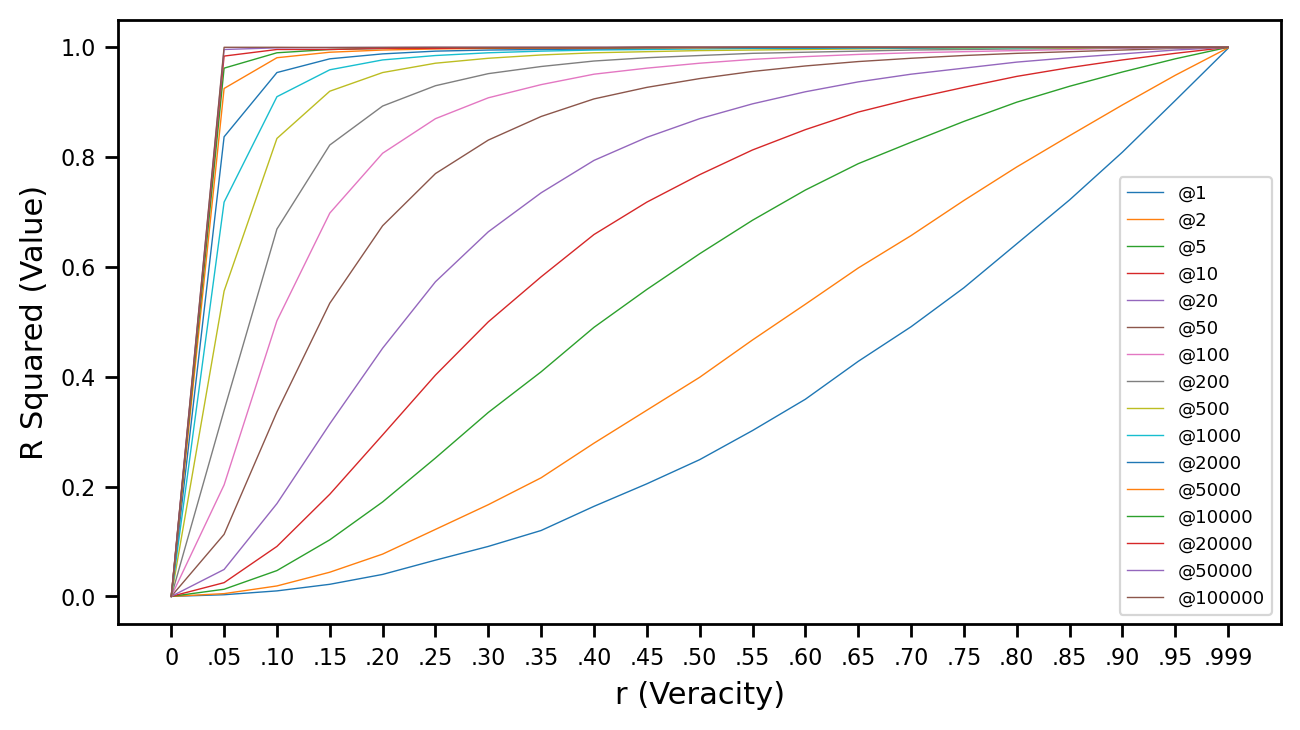

In [3]:
# Plot creation
s = sns.set_context("paper")

plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('axes', titlesize=11)  # fontsize of the figure title
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
plt.rc('legend', fontsize=9)    # legend fontsize

fig, ax = plt.subplots(figsize=(7.5,4), dpi=200, facecolor='w')
RCount = 0
for idx, row in BigDataVVVdf.iterrows():
    #print(idx, row)
    VarLabel = '@' + row[0].astype(int).astype(str)
    Vardf = pd.DataFrame()
    Vardf['RSquare'] = row
    Vardf = Vardf.iloc[1:,:]
    Vardf.reset_index(inplace=True)
    Vardf.columns = ['r', VarLabel ]
    _ = ax.plot('r', VarLabel, data=Vardf, linewidth=.5 )
    RCount = RCount + 1
plt.legend(loc="lower right", prop={'size': 6.5})
ax.set_xlabel("r (Veracity)")
ax.set_ylabel("R Squared (Value)")

### Diminishing Returns in Added Value from Adding Volume

If you plot the R Squared by numbers of variables (volume) for a single r value (veracity), it seems clear that there are diminishing returns in the level of value creation for adding variables to the model.  Only a subset of the N values are shown to enhance visibility.  Any set of limits can be chosen.

########################################################################
Plot of Values = R Squared, for Volumes = N, and Veracity set to r = .01
########################################################################


Text(0, 0.5, 'R Squared (Value)')

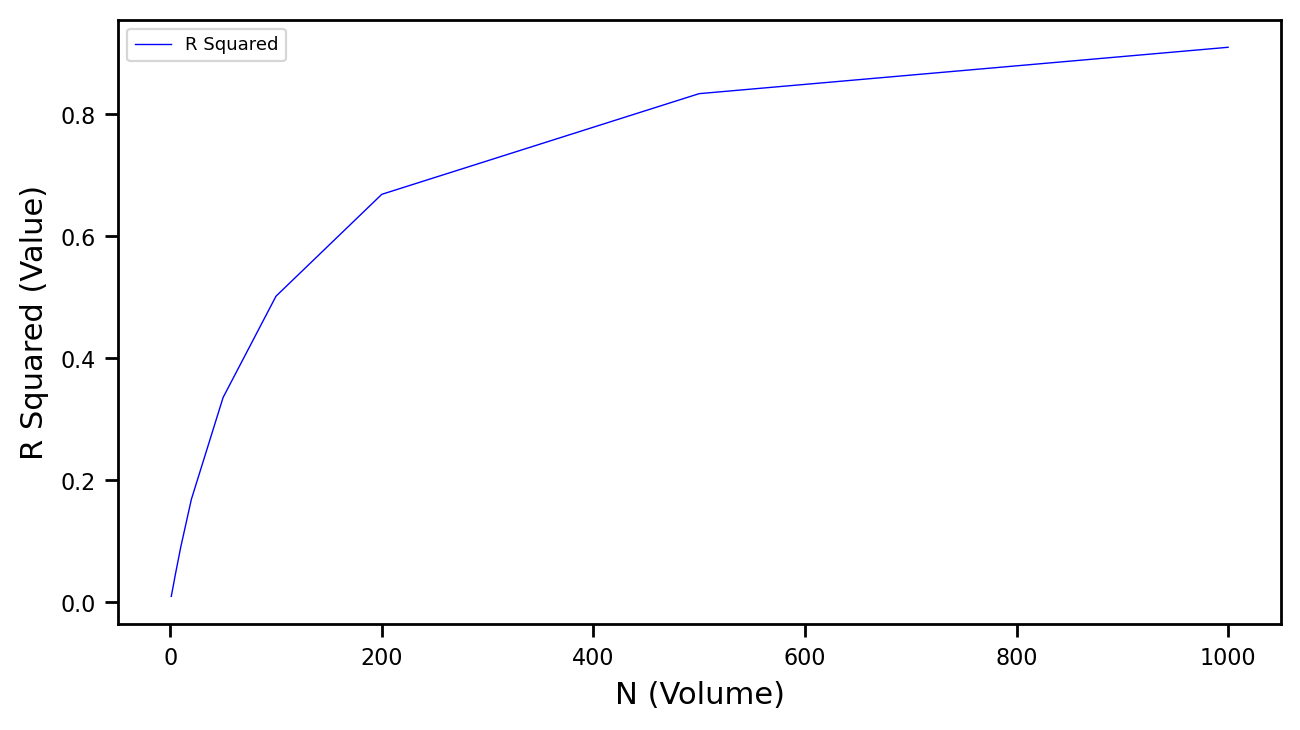

In [4]:
SampleBigDataVVVdf = BigDataVVVdf.iloc[0:10, [0,3]]
SampleBigDataVVVdf.columns = ['N', 'R Squared'] 

print('########################################################################')
print('Plot of Values = R Squared, for Volumes = N, and Veracity set to r = .01')
print('########################################################################')

# Uncomment to see values
# print(SampleBigDataVVVdf)

# Plot creation
s = sns.set_context("paper")

plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('axes', titlesize=11)  # fontsize of the figure title
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
plt.rc('legend', fontsize=9)    # legend fontsize

fig, ax = plt.subplots(figsize=(7.5,4), dpi=200, facecolor='w')

lin1 = ax.plot('N', 'R Squared', data=SampleBigDataVVVdf,color="blue", linewidth=.5 )

plt.legend(loc="upper left", prop={'size': 6.5})
ax.set_xlabel("N (Volume)")
ax.set_ylabel("R Squared (Value)")

### Diminishing Returns in Added Value from Adding Veracity

In a similar fashion, adding veracity also has diminishing returns.  The plot below shows the effect on R Squared for increasing values of r with N heald constant.  There are diminishing returns for all levels of r.  This pattern holds for all values of N.

#########################################################################
Plot of Values = R Squared, for Volume = 50, and Veracity from r =.05-.95
#########################################################################


Text(0, 0.5, 'R Squared (Value)')

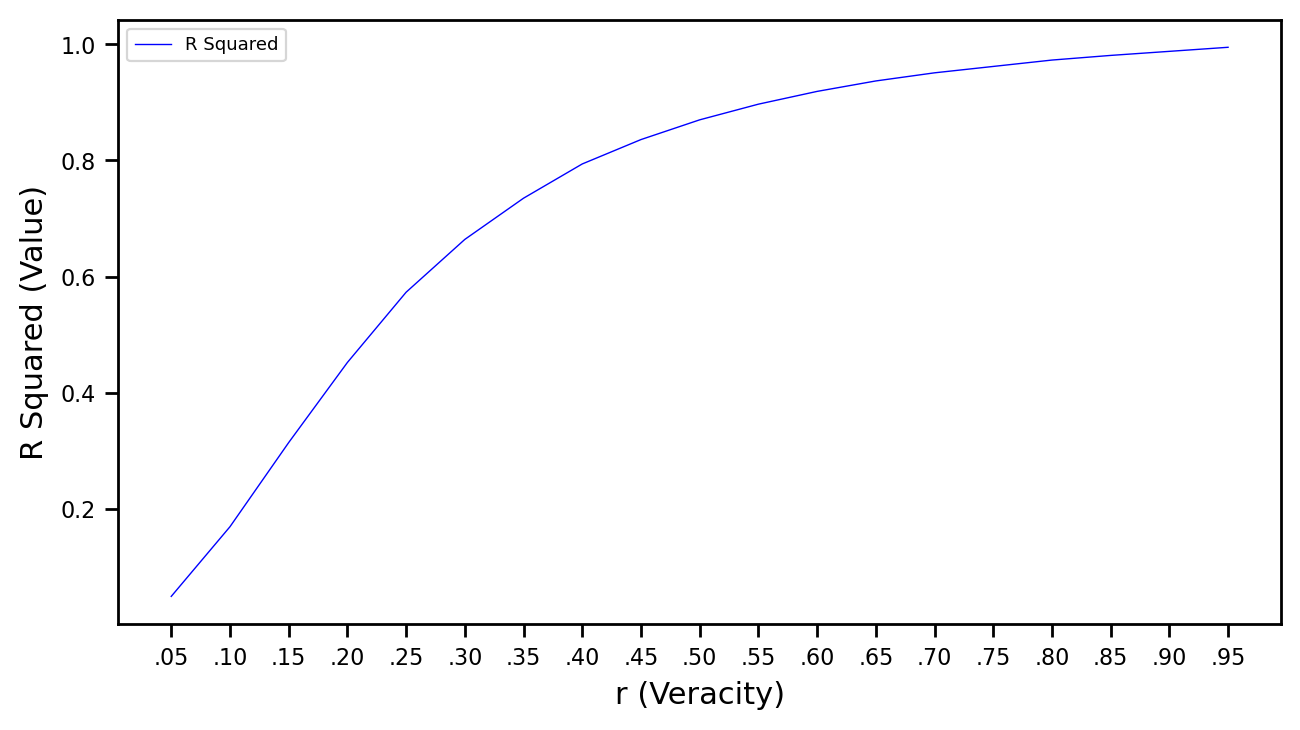

In [5]:
SampleBigDataVVVdf = BigDataVVVdf.T.iloc[2:21, [4]]
SampleBigDataVVVdf.reset_index(inplace=True)
SampleBigDataVVVdf.columns = ['r', 'R Squared'] 

print('#########################################################################')
print('Plot of Values = R Squared, for Volume = 50, and Veracity from r =.05-.95')
print('#########################################################################')

# Uncomment to see values
# print(SampleBigDataVVVdf)

# Plot creation
s = sns.set_context("paper")

plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('axes', titlesize=11)  # fontsize of the figure title
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
plt.rc('legend', fontsize=9)    # legend fontsize

fig, ax = plt.subplots(figsize=(7.5,4), dpi=200, facecolor='w')

lin1 = ax.plot('r', 'R Squared', data=SampleBigDataVVVdf,color="blue", linewidth=.5 )

plt.legend(loc="upper left", prop={'size': 6.5})
ax.set_xlabel("r (Veracity)")
ax.set_ylabel("R Squared (Value)")

### Linear Increase in Value with Uncorrelated Variety

The results shown above indicate that, for any given model, adding variables that are correlated with exisiting variables will lead to diminishing returns in terms of value.  This is true when adding volume or veracity.  The quickest way to get around this problem is to add variety.  If you can find predictive variables that provide new information that is uncorrelated with the existing variables, you can rapidly improve the accuracy of your model.

The number of variables needed to produce R Squared = 1.000 when there is no inter-correlation is provided by the following formula.

N = 1 / r ** 2

########################################################################################
Plot of Values = R Squared, for Volume = 1-25, Veracity r =.20, and Uncorrelated Variety
########################################################################################


Text(0, 0.5, 'R Squared (Value)')

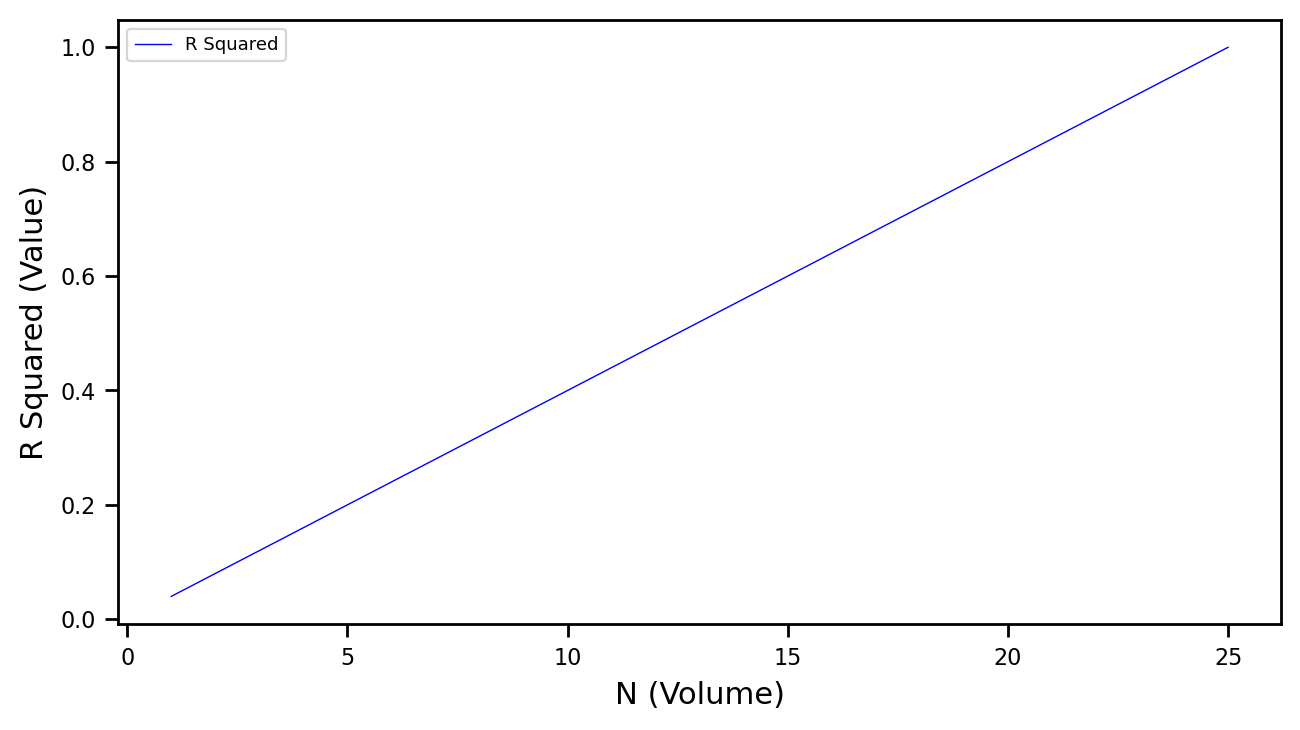

In [6]:
SampleBigDataVVVdf = pd.DataFrame()
SampleBigDataVVVdf['N'] = list(range(1,26))
SampleBigDataVVVdf['R Squared'] = SampleBigDataVVVdf['N'] * .04

print('########################################################################################')
print('Plot of Values = R Squared, for Volume = 1-25, Veracity r =.20, and Uncorrelated Variety')
print('########################################################################################')

# Uncomment to see values
# print(SampleBigDataVVVdf)

# Plot creation
s = sns.set_context("paper")

plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('axes', titlesize=11)  # fontsize of the figure title
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
plt.rc('legend', fontsize=9)    # legend fontsize

fig, ax = plt.subplots(figsize=(7.5,4), dpi=200, facecolor='w')

lin1 = ax.plot('N', 'R Squared', data=SampleBigDataVVVdf,color="blue", linewidth=.5 )

plt.legend(loc="upper left", prop={'size': 6.5})
ax.set_xlabel("N (Volume)")
ax.set_ylabel("R Squared (Value)")

## Conclusion 

The analyses indicate that it can take large numbers of variables (volume) and/or high predictive validity variables (veracity) to achieve high accuracy levels (value) when variables are inter-correlated.

One way to reduce the numbers of variables needed is to do factor analysis, and creating uncorrelated variables.  This dramatically reduces the number of variables needed .  In this case, adding variety can create linear increases in the accuracy of the model.  The fastest way to increase value is to find additional variables that provide new information that is not included in the other variables.

The code for generating the data used in the calculations shown above is provided below if you want to try this out.

## Run the Calculations Yourself

If you want to play around with the calculation, you can try them yourself.  Simply set up the model and run it.  

Note that this runs quickly for small numbers of variables.  When I ran the model with 100,000 variables, I needed to bump my PC up to 128GB and it still took a week.

Also, the statsmodel regression breaks if the model gets too large.

## Create correlated variables without controlling the inter-correlation levels

### Manually set up the correlation coefficient and number of variables to calculate the R Squared for

In [7]:
# Change these values to your own choices
Correlation = .5
Variables = 5

# Leave these constants alone
Mean = 0
SD = 1
NumberOfRows = 100000

print('Correlation: r = ' + str(Correlation))
print('Variables: N = ' + str(Variables))

Correlation: r = 0.5
Variables: N = 5


### Calculate the R Squared for the correlation and number of variables specified

In [8]:
# Calculate y for the mean, standard deviation, and number of rows specified
y = np.random.normal(Mean, SD, NumberOfRows)

# Convert y to a dataframe and name the variable 'Y'
df=pd.DataFrame(y, columns=list('Y'))

# Add correlated variables (r###) to the dataframe equal to the number of variables specified above
for n in range(0,Variables):
    x = np.random.normal(Mean, SD, NumberOfRows)
    nchar = 'r' + str(n+1)
    df[nchar] = df['Y'] * Correlation + x * np.sqrt(1-Correlation**2)
    
# Set up the variables
X = df.iloc[0:NumberOfRows,1:Variables] ## X usually means our input variables (or independent variables)
y = df["Y"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Run the regression model
regressor = LinearRegression() # Creating a regressor
regressor.fit(X,y) # Fitting the dataset into the model

y_pred = regressor.predict(X)

print('Mean squared Error: %.5f' %  mean_squared_error(y,y_pred)) # Priniting the mean error
print('R2 score: %.6f' % r2_score(y,y_pred)) # Printing R2 Score

Mean squared Error: 0.43068
R2 score: 0.566975


### Checking the Inter-Correlation Levels

This code lets you see what the inter-correlation was.

In [16]:
# Calculate the average inter-correlation
Correlationdf = pd.DataFrame(np.triu(df.corr().values))
Correlationdf = Correlationdf.iloc[1:,2:]
Correlationdf = Correlationdf.replace({0:np.nan, 1:np.nan})
print('Mean Inter-correlation: ', Correlationdf.stack().mean())
# Run the correlation matrix.  Note that there is random error
corrMatrix = df.corr()
print (corrMatrix)

Mean Inter-correlation:  0.24969129012167618
           Y        r1        r2        r3        r4        r5
Y   1.000000  0.497553  0.499989  0.497475  0.497814  0.497313
r1  0.497553  1.000000  0.251548  0.248051  0.255359  0.249709
r2  0.499989  0.251548  1.000000  0.252248  0.248198  0.248946
r3  0.497475  0.248051  0.252248  1.000000  0.246893  0.247918
r4  0.497814  0.255359  0.248198  0.246893  1.000000  0.248044
r5  0.497313  0.249709  0.248946  0.247918  0.248044  1.000000


### Statsmodel version (Note: Statsmodel crashes with large models)

I like the extra infromtion the Statsmodel generates.  However, Statsmodel crashes for large N.

In [10]:
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())
print('R Squared = ' + str(model.rsquared))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                 3.273e+04
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:54:34   Log-Likelihood:                -99774.
No. Observations:              100000   AIC:                         1.996e+05
Df Residuals:                   99995   BIC:                         1.996e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.002      0.943      0.3

## Replicating the Calculations with No Inter-Correlation

Recall that removing the inter-correlation results in markedly lower numbers of variables needed.  There are a couple of different ways to remove inter-correlation.  

The first method for removing inter-correlation is to do a factor analysis.  If one does a factor analysis, the results can be used to create factors that are have no inter-correlation.

The second method for removing inter-correlation is to use the Cholesky decomposition.  This permits the inter-correlation to be set to zero.  That method is shown below.

### Using the Cholesky Decomposition to create correlation matrices

One of the interesting findings that came out of these analyses was the fact that the R Squared values for a model in which there is no inter-correlation between variables is simply additive.  For example, the R Squared for an individual variable with r(x,y) = .5 is simply .5 * .5 = .25.  Then, the R Squared value for the linear regression model with 4 variables with r(x,y) = .5 is 1.000.  It is then an easy process to compute the R Squared for any number of variables where the r(x,y) is known for the predictors.

One might ask where this is useful.  One can create completely uncorrelated predictors using factor analysis on the variables with inter-correlation.  In that case, the model size can be substantially reduced.

I have set up the Python code to create the randomly correlated variables with no inter-correlation for the case r(x,y) = .5.  This uses a Cholesky Decomposition.  Note that the R Squared cannot = 1 exactly because the program crashes in that case.  One of the variables must have a value slightly less than r(x,y) = .5.

### First create a 5x5 dataframe with r(x,y) = .5 for y to X(1-4), and all X-X correlations = 0. 

In [11]:
# Set up the correlation matrix
# Note that the Cholesky Decomposition will not let all correlations be r = .500 so one was .4999999
corr_mat= np.array([[ 1, .5, .5, .5, .4999999],
                    [.5, 1, 0, 0, 0],
                    [.5, 0, 1, 0, 0],
                    [.5, 0, 0, 1, 0],
                    [.4999999, 0, 0, 0, 1]])

# Compute the (upper) Cholesky decomposition matrix
upper_chol = cholesky(corr_mat)

# Generate 5 sets of 1,000,000 normally distributed (Gaussian) numbers with mean = 0, stdDev = 1.
rnd = np.random.normal(0.0, 1.0, size=(10**7, 5))

# Finally, compute the inner product of upper_chol and rnd
Choleskydf = pd.DataFrame(rnd @ upper_chol)
Choleskydf.columns = ['Y', 'X1', 'X2', 'X3', 'X4']
XChol = Choleskydf.iloc[0:10**7,1:5] ## X usually means our input variables (or independent variables)
yChol = Choleskydf["Y"] ## Y usually means our output/dependent variable
XChol = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
Choleskydf.describe()

,Y,X1,X2,X3,X4
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,1.640814e-04,-4.649278e-04,1.664175e-04,5.085966e-04,1.183832e-04
std,1.000298e+00,9.999630e-01,1.000003e+00,1.000414e+00,1.000096e+00
min,-5.310672e+00,-5.242242e+00,-5.846498e+00,-5.149222e+00,-5.134532e+00
25%,-6.747295e-01,-6.751868e-01,-6.741775e-01,-6.740914e-01,-6.745770e-01
50%,6.473875e-05,-5.837730e-04,1.568526e-04,5.663175e-04,7.790130e-05
75%,6.747525e-01,6.738059e-01,6.742738e-01,6.753260e-01,6.747846e-01
max,5.491234e+00,5.087470e+00,5.841230e+00,5.358430e+00,5.229193e+00


### Check the inter-correlation for the correlation matrix generated by the Choleky Decomposition

In [17]:
# Calculate the average inter-correlation
Correlationdf = pd.DataFrame(np.triu(Choleskydf.corr().values))
Correlationdf = Correlationdf.iloc[1:,2:]
Correlationdf = Correlationdf.replace({0:np.nan, 1:np.nan})
print('Mean Inter-correlation: ', Correlationdf.stack().mean())
# Run the correlation matrix.  Note that there is random error
corrMatrix = Choleskydf.corr()
print (corrMatrix)

Mean Inter-correlation:  0.00011953699432799113
           Y        X1        X2        X3        X4
Y   1.000000  0.500007  0.499642  0.500305  0.500405
X1  0.500007  1.000000 -0.000182  0.000173  0.000358
X2  0.499642 -0.000182  1.000000 -0.000286  0.000047
X3  0.500305  0.000173 -0.000286  1.000000  0.000607
X4  0.500405  0.000358  0.000047  0.000607  1.000000


### Run the Statsmodel linear regression and ge the Cholesky R Squared = .999999

In [18]:
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())
print('R Squared = ' + str(model.rsquared))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                 3.273e+04
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:58:15   Log-Likelihood:                -99774.
No. Observations:              100000   AIC:                         1.996e+05
Df Residuals:                   99995   BIC:                         1.996e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.002      0.943      0.3